# Analysing Iphone Health Data

## Exporting Data

Follow the steps given below to extract the health data out of your Iphone:
1. Open Health App in your IPhone
2. Go to Profile (in the top right corner)
3. Tap on 'Export Health Data'
4. Choose Export in the confirmation popup
5. Export the data to your drive or mail or any of the options suitable to you. You need to get the file to your computer

## Converting Data into usable format

You will seee that the file extracted is a .zip file. Follow the steps below to convert it to excel format:
1. Extract the zipped file using Winzip or any similar tool
2. Go to  https://conversiontools.io/conversion/convert_xml_to_excel and upload the "export.xml" file.
3. Click on Convert
4. Download and save the file as "export.xlsx" in the same directory as this notebook

Your data is ready now.

## Code 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('export.xlsx')
df.tail()

,HealthData,locale,ExportDate,value,Me,HKCharacteristicTypeIdentifierDateOfBirth,HKCharacteristicTypeIdentifierBiologicalSex,HKCharacteristicTypeIdentifierBloodType,HKCharacteristicTypeIdentifierFitzpatrickSkinType,Record,...,sourceVersion,unit,creationDate,startDate,endDate,value.1,MetadataEntry,key,value.2,device
2659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,NaN,2018-07-24 21:00:24 +0530,2018-07-24 03:00:00 +0530,2018-07-24 10:24:00 +0530,HKCategoryValueSleepAnalysisInBed,NaN,HKWasUserEntered,1,NaN
2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50,NaN,2018-07-25 10:00:38 +0530,2018-07-25 03:08:40 +0530,2018-07-25 09:35:00 +0530,HKCategoryValueSleepAnalysisInBed,NaN,HKTimeZone,Asia/Kolkata,"<<HKDevice: 0x1c4688f70>, name:iPhone, manufac..."
2661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50,NaN,2018-07-25 10:00:38 +0530,2018-07-25 09:35:32 +0530,2018-07-25 10:00:32 +0530,HKCategoryValueSleepAnalysisInBed,NaN,HKTimeZone,Asia/Kolkata,"<<HKDevice: 0x1c46892e0>, name:iPhone, manufac..."
2662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50,NaN,2018-07-26 10:14:05 +0530,2018-07-26 02:05:32 +0530,2018-07-26 10:14:05 +0530,HKCategoryValueSleepAnalysisInBed,NaN,HKTimeZone,Asia/Kolkata,"<<HKDevice: 0x1c4689100>, name:iPhone, manufac..."
2663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50,NaN,2018-07-27 09:45:08 +0530,2018-07-27 01:30:00 +0530,2018-07-27 09:45:04 +0530,HKCategoryValueSleepAnalysisInBed,NaN,HKTimeZone,Asia/Kolkata,"<<HKDevice: 0x1c46891a0>, name:iPhone, manufac..."


In [3]:
df.columns

Index(['HealthData', 'locale', 'ExportDate', 'value', 'Me',
       'HKCharacteristicTypeIdentifierDateOfBirth',
       'HKCharacteristicTypeIdentifierBiologicalSex',
       'HKCharacteristicTypeIdentifierBloodType',
       'HKCharacteristicTypeIdentifierFitzpatrickSkinType', 'Record', 'type',
       'sourceName', 'sourceVersion', 'unit', 'creationDate', 'startDate',
       'endDate', 'value.1', 'MetadataEntry', 'key', 'value.2', 'device'],
      dtype='object')

In [4]:
df2 = df[[ 'type', 'startDate',
       'endDate', 'value.1', ]]

In [5]:
df2.head()

,type,startDate,endDate,value.1
0,HKQuantityTypeIdentifierBodyMassIndex,2018-06-30 13:48:00 +0530,2018-06-30 13:48:00 +0530,23.04
1,HKQuantityTypeIdentifierHeight,2018-06-30 13:48:00 +0530,2018-06-30 13:48:00 +0530,178
2,HKQuantityTypeIdentifierBodyMass,2018-06-30 13:48:00 +0530,2018-06-30 13:48:00 +0530,73
3,HKQuantityTypeIdentifierStepCount,2018-06-21 18:50:42 +0530,2018-06-21 18:58:57 +0530,134
4,HKQuantityTypeIdentifierStepCount,2018-06-21 19:29:02 +0530,2018-06-21 19:38:24 +0530,101


In [6]:
df2.type.unique()

array(['HKQuantityTypeIdentifierBodyMassIndex',
       'HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierWaistCircumference',
       'HKCategoryTypeIdentifierSleepAnalysis'], dtype=object)

In [7]:
df3 = df2[df2['type'].isin(['HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierFlightsClimbed',])]

In [8]:
df3.head()

,type,startDate,endDate,value.1
3,HKQuantityTypeIdentifierStepCount,2018-06-21 18:50:42 +0530,2018-06-21 18:58:57 +0530,134
4,HKQuantityTypeIdentifierStepCount,2018-06-21 19:29:02 +0530,2018-06-21 19:38:24 +0530,101
5,HKQuantityTypeIdentifierStepCount,2018-06-21 19:38:24 +0530,2018-06-21 19:44:58 +0530,3
6,HKQuantityTypeIdentifierStepCount,2018-06-21 21:14:57 +0530,2018-06-21 21:21:04 +0530,2
7,HKQuantityTypeIdentifierStepCount,2018-06-21 21:21:04 +0530,2018-06-21 21:27:03 +0530,26


In [9]:
def timestamp(x):
    return pd.Timestamp(x)

df3['datetime'] = df3['startDate'].apply(timestamp)
df3.index = df3['datetime']
del df3['datetime']
df3.head()

C:\Users\priitish\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,type,startDate,endDate,value.1
datetime,,,,
2018-06-21 18:50:42+05:30,HKQuantityTypeIdentifierStepCount,2018-06-21 18:50:42 +0530,2018-06-21 18:58:57 +0530,134
2018-06-21 19:29:02+05:30,HKQuantityTypeIdentifierStepCount,2018-06-21 19:29:02 +0530,2018-06-21 19:38:24 +0530,101
2018-06-21 19:38:24+05:30,HKQuantityTypeIdentifierStepCount,2018-06-21 19:38:24 +0530,2018-06-21 19:44:58 +0530,3
2018-06-21 21:14:57+05:30,HKQuantityTypeIdentifierStepCount,2018-06-21 21:14:57 +0530,2018-06-21 21:21:04 +0530,2
2018-06-21 21:21:04+05:30,HKQuantityTypeIdentifierStepCount,2018-06-21 21:21:04 +0530,2018-06-21 21:27:03 +0530,26


In [10]:
step_count = df3[df3.type == 'HKQuantityTypeIdentifierStepCount'].drop('type', axis=1)
walk = df3[df3.type == 'HKQuantityTypeIdentifierDistanceWalkingRunning'].drop('type', axis=1)

In [11]:
walk.head()

,startDate,endDate,value.1
datetime,,,
2018-06-21 18:50:42+05:30,2018-06-21 18:50:42 +0530,2018-06-21 18:58:57 +0530,0.09989
2018-06-21 19:29:02+05:30,2018-06-21 19:29:02 +0530,2018-06-21 19:38:24 +0530,0.07146
2018-06-21 19:38:24+05:30,2018-06-21 19:38:24 +0530,2018-06-21 19:44:58 +0530,0.00165
2018-06-21 21:14:57+05:30,2018-06-21 21:14:57 +0530,2018-06-21 21:21:04 +0530,0.00138
2018-06-21 21:21:04+05:30,2018-06-21 21:21:04 +0530,2018-06-21 21:27:03 +0530,0.01794


In [32]:
''' only July data'''
walk = walk['7-2018']

'''Getting Hourly Data'''
num_days = len(np.unique(walk.index.date))
walk_hour = walk.groupby([walk.index.hour]).sum()*1000
walk_hour['value.1'] = walk_hour['value.1']/num_days
walk_hour.index = walk_hour.index.astype(int)


'''adding missing hours'''
missing_hours_list = np.setdiff1d(range(24),walk_hour.index.values)
missing_hours = pd.DataFrame(np.zeros(len(missing_hours_list)))
missing_hours.set_index(missing_hours_list, inplace=True)
                       
walk_hour = pd.concat([walk_hour, missing_hours]).sort_index(ascending=True)
walk_hour.fillna(0, inplace=True)
# walk_hour.drop(0, inplace=True)


C:\Users\priitish\Anaconda3\lib\site-packages\pandas\indexes\api.py:71: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)


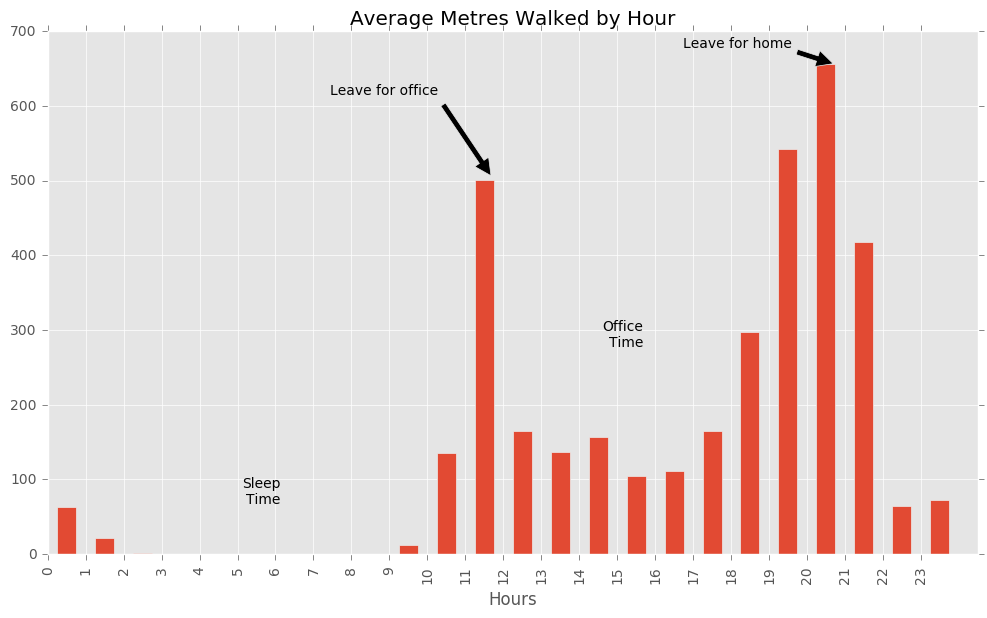

In [44]:
ax = walk_hour.plot(kind='bar', width =1, legend=False, figsize=(12,6.75))
plt.xlabel('Hours')
plt.title('Average Metres Walked by Hour')
xticks = list(walk_hour.index.values -0.75)
plt.xticks(xticks)

ax.annotate('Leave for office',(walk_hour.index[11], walk_hour['value.1'][11]), xytext=(0.42, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='top' ) 

ax.annotate('Leave for home',(walk_hour.index[20], walk_hour['value.1'][20]), xytext=(0.8, 0.99), textcoords='axes fraction', xycoords='data'
            ,arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='top' )
# ax.annotate('',(0.25,.15), xytext=(0.25, 0.1), textcoords='axes fraction', xycoords='axes fraction',
#             horizontalalignment='right', verticalalignment='top' ,arrowprops=dict(arrowstyle =  '|-|', facecolor ='black'))

ax.annotate('Sleep\nTime', xy=(walk_hour.index[4], walk_hour['value.1'][4]), xytext=(0.25,0.15),  textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top' )

ax.annotate('Office\nTime', xy=(walk_hour.index[14], walk_hour['value.1'][14]), xytext=(0.64,0.45),  textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top' )
# plt.show()


In [16]:
num_days

28

In [17]:
walk_hour.dtypes

startDate     object
endDate       object
value.1      float64
0            float64
dtype: object

In [22]:
walk_hour

,startDate,endDate,value.1,0
1,2018-07-07 01:35:39 +05302018-07-10 01:03:54 +...,2018-07-07 01:44:10 +05302018-07-10 01:10:19 +...,22.124286,0.0
2,2018-07-01 02:11:00 +05302018-07-20 02:19:03 +...,2018-07-01 02:17:26 +05302018-07-20 02:25:11 +...,1.746786,0.0
3,2018-07-14 03:24:23 +05302018-07-18 03:53:02 +...,2018-07-14 03:30:28 +05302018-07-18 03:59:15 +...,0.713214,0.0
4,2018-07-21 04:05:18 +05302018-07-21 04:05:18 +...,2018-07-21 04:11:29 +05302018-07-21 04:11:29 +...,0.425000,0.0
5,0,0,0.000000,0.0
6,0,0,0.000000,0.0
7,0,0,0.000000,0.0
8,0,0,0.000000,0.0
9,2018-07-02 09:29:35 +05302018-07-02 09:42:03 +...,2018-07-02 09:36:19 +05302018-07-02 09:48:16 +...,11.739643,0.0
10,2018-07-02 10:05:37 +05302018-07-02 10:13:36 +...,2018-07-02 10:13:36 +05302018-07-02 10:20:22 +...,135.582679,0.0
